## Загрузим нужные библиотеки

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import numpy as np
from sklearn.metrics import recall_score, precision_score

%matplotlib inline

In [2]:
df = pd.read_csv("train_dataset_train.csv")

## Рассмотрим датасет по ближе

In [3]:
# df.carts_created_at.value_counts()                   

In [4]:
# df.communication_type.value_counts()                   

### Заменим все пропуски в данных

In [5]:
df = df.fillna(0)

Пострим на распределение данных

Text(0.5, 1.0, 'Распределение предсказываемой величены')

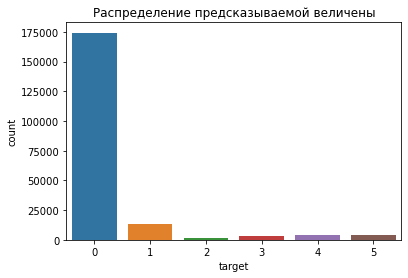

In [6]:
sns.countplot(x = "target" , data  = df).set_title('Распределение предсказываемой величены')

Text(0.5, 1.0, 'Распределение возраста')

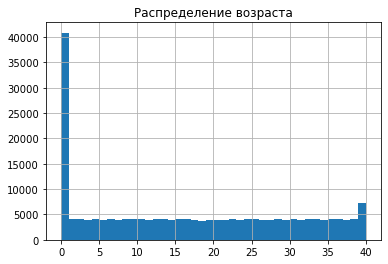

In [7]:
df["age_indicator"].hist(bins = 40).set_title('Распределение возраста')

In [8]:
df["age_indicator"].std()

13.15109413715573

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

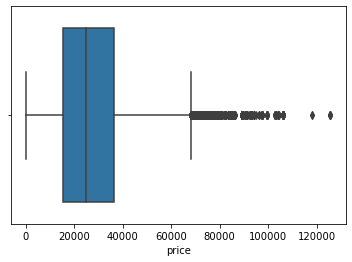

In [9]:
sns.boxplot(df["price"])

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_indicator'>

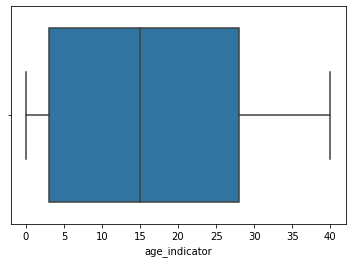

In [10]:
# 
sns.boxplot(df["age_indicator"])

## Выделим выборки

In [11]:
# 1 **************************
def get_month(day):
    return int(day[0])
      
df['month_num'] = df['month_id'].apply(get_month)


In [12]:
df['month_num'].isna().sum()

0

In [13]:
df['month_num'].value_counts()

1    73547
9    23967
8    20938
7    18076
6    15672
5    13807
4    12528
3    11353
2    10112
Name: month_num, dtype: int64

In [14]:
df['promo'].isna().sum()

0

In [15]:
# 2 **************************
df['promo'] = df['promo'].map({'+': 1, '-': 0})

In [16]:
from scipy import stats
promo_y = df[df['promo'] == 1]['target']
promo_n = df[df['promo'] == 0]['target']
stats.ttest_ind(promo_y, promo_n)

#pvalue = 1.7881097772288512e-06
#pvalue=0.46783149713616656)

Ttest_indResult(statistic=4.77614824426857, pvalue=1.7881097772288512e-06)

In [17]:
from scipy.stats import pointbiserialr
pointbiserialr(df['promo'], df['price'])

# менее чем слабая отрицательная корреляция  между участвовал ли в любой промокампании и ценой , 

PointbiserialrResult(correlation=-0.015550643608587999, pvalue=3.529717505007156e-12)

In [18]:
pointbiserialr(df['promo'], df['target'])
# менее чем слабая отрицательная корреляция  между участвовал ли в любой промокампании и target

PointbiserialrResult(correlation=0.010679236529467373, pvalue=1.7881097785906104e-06)

In [19]:
# pd.crosstab(df['promo'], df['target'])

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


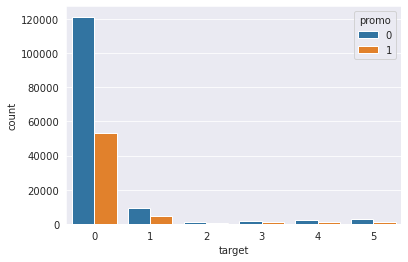

In [20]:
with sns.axes_style('darkgrid'):
    sns.countplot(df['target'], hue=df['promo'] )

In [21]:
# sns.heatmap(pd.crosstab(df['promo'], df['target']),
#             cmap="YlGnBu", annot=True, cbar=False);

In [22]:
# 3 **************************

#df['carts_created_at'].unique()
df['month_created'] = df['carts_created_at'].apply(get_month)

In [23]:
df['month_created'].isna().sum()

0

In [24]:
from scipy.stats import pointbiserialr
pointbiserialr(df['promo'], df['month_created'])
# менее чем слабая  корреляция  между участвовал ли в любой промокампании и month_created

PointbiserialrResult(correlation=0.06366360648760609, pvalue=1.1726115566697185e-178)

In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["ABC"] = le.fit_transform(df["ABC"])
df["ABC"].unique()

array([3, 0, 1, 2])

In [26]:
#https://dyakonov.org/2016/08/03/python-%D0%BA%D0%B0%D1%82%D0%B5%D0%B3%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5-%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%B8/

def feature_mean(data,cat_feature,real_feature):
    return (data[cat_feature].map(data.groupby(cat_feature)[real_feature].mean()))

In [27]:
df['student_price'] = feature_mean(df,'student_id','price')

In [28]:
df.columns

Index(['id', 'age_indicator', 'month_id', 'student_id', 'program_id',
       'carts_created_at', 'spent_time_total', 'spent_time_to_complete_hw',
       'completed_hw', 'failed_hw', 'reworked_hw', 'interacted_hw',
       'avg_hw_mark', 'test_with_good_mark', 'test_with_great_mark',
       'webinars', 'avg_quiz_result', 'notes', 'hw_leader', 'lessons',
       'activity', 'bought_d1', 'bought_d2', 'bought_d3', 'bought_d4',
       'bought_d5', 'bought_avg_duration', 'payment_type', 'promo', 'price',
       'communication_type', 'auto_payment', 'ABC', 'city', 'country',
       'gender', 'speed_recall', 'os', 'browser', 'platform',
       'm_avg_talk_duration', 'm_avg_duration', 'm_missed_calls',
       'm_total_calls', 'm_was_conversations', 'm_total_duration',
       'p_avg_talk_duration', 'p_avg_duration', 'p_missed_calls',
       'p_total_calls', 'p_was_conversations', 'p_total_duration',
       'support_feedback_avg', 'feedback_avg_d1', 'feedback_avg_d2',
       'feedback_avg_d3', 'fee

In [29]:
# # 5*****************************
# def outliers_indices(feature):
#     '''
#     Будем считать выбросами все точки, выходящие за пределы трёх сигм.
#     '''
#     mid = df[feature].mean()
#     sigma = df[feature].std()
#     return df[(df[feature] < mid - 3*sigma) | (df[feature] > mid + 3*sigma)].index
# wrong_price = outliers_indices('price')
# df = df.drop(wrong_price).copy()

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

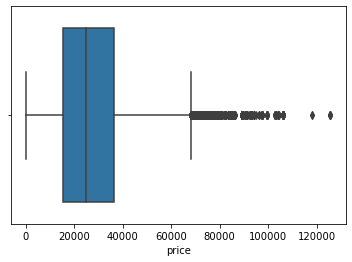

In [30]:
sns.boxplot(df["price"])

In [32]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6)

X_cluster = df.loc[:, ['id',
                       "student_id", 
                       'price',
                        'student_price',                       
                       
                       'age_indicator',
                       
                       'feedback_avg_d1', 
        
                        'feedback_avg_d3', 
                        'feedback_avg_d5', 
                       
                       'webinars','lessons',
                       
                       
                         
                                            
                      ]].fillna(-1)

X_cluster["Cluster"] = kmeans.fit_predict(X_cluster )
# X_klaster["Cluster"] = X_klaster ["Cluster"].astype("category")
df['cluster'] = X_cluster ["Cluster"].astype("int")


In [50]:
# для нормализации
# и добавили month_num 
# добавили promo 
# добавили month_created
# добавили'bought_d4'
# добавили 'id'

df_for_norm = df[['id','ABC', 'hw_leader','activity', 'm_avg_duration', 'm_avg_talk_duration', 
        'student_id','program_id',
          'month_num', 'promo','month_created',                        
          'age_indicator', 'p_total_calls','speed_recall',
          'support_feedback_avg',
          'feedback_avg_d1',                  
          'feedback_avg_d3','feedback_avg_d5','price',
                  'student_price','cluster'
         ]]



In [36]:
from datetime import datetime
datetime.now()


,id,ABC,hw_leader,activity,m_avg_duration,m_avg_talk_duration,student_id,program_id,month_num,promo,...,speed_recall,support_feedback_avg,feedback_avg_d1,feedback_avg_d2,feedback_avg_d3,feedback_avg_d4,feedback_avg_d5,price,student_price,cluster
0,15182,3,0.0,32.0,0.0,0.0,6694527,1469,9,1,...,0.0,4.0,5.0,0.0,0.0,0.0,0.0,20042.959300,20042.959300,4
1,89385,0,0.0,0.0,0.0,0.0,6712877,1392,6,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,15057.315000,15057.315000,4
2,47931,3,0.0,0.0,0.0,0.0,6659444,376,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23389.029300,23389.029300,4
3,279085,1,0.0,0.0,0.0,0.0,7151591,1160,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22260.632220,22260.632220,0
4,7806,0,0.0,0.0,0.0,0.0,6705666,952,1,0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,7255.515915,7255.515915,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,179932,3,0.0,0.0,0.0,0.0,6816668,1043,1,1,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,10263.967450,16645.988597,4
199996,257734,3,0.0,0.0,0.0,0.0,6984939,1635,9,0,...,0.0,0.0,4.5,0.0,0.0,0.0,0.0,35998.565400,35998.565400,4
199997,43549,3,0.0,0.0,0.0,0.0,6670084,789,3,1,...,0.0,3.0,0.0,0.0,0.0,4.0,0.0,22084.062000,22084.062000,4
199998,100800,0,0.0,0.0,6.0,6.0,6917324,476,6,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14377.805400,14377.805400,4


In [51]:
from sklearn.preprocessing import MinMaxScaler
# Нормализация данных
# https://pythobyte.com/normalize-data-in-python-4d4da21f/

scaler = MinMaxScaler()

X =  pd.DataFrame(scaler.fit_transform(df_for_norm),
            columns=df_for_norm.columns, index=df_for_norm.index) 



In [31]:
# # id уже нормализован
# # X = pd.concat([df['id'],df_normalized],ignore_index=False,axis = 1)
# X = df_normalized

In [38]:
X

,id,ABC,hw_leader,activity,m_avg_duration,m_avg_talk_duration,student_id,program_id,month_num,promo,...,speed_recall,support_feedback_avg,feedback_avg_d1,feedback_avg_d2,feedback_avg_d3,feedback_avg_d4,feedback_avg_d5,price,student_price,cluster
0,0.053268,1.000000,0.0,0.163265,0.000000,0.000000,0.835711,0.539230,1.000,1.0,...,0.000000,0.8,1.0,0.0,0.0,0.0,0.0,0.159523,0.159523,0.8
1,0.313635,0.000000,0.0,0.000000,0.000000,0.000000,0.838002,0.510733,0.625,0.0,...,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.119842,0.119842,0.8
2,0.168179,1.000000,0.0,0.000000,0.000000,0.000000,0.831331,0.134715,0.125,1.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.186154,0.186154,0.8
3,0.979263,0.333333,0.0,0.000000,0.000000,0.000000,0.892773,0.424870,0.000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.177173,0.177173,0.0
4,0.027387,0.000000,0.0,0.000000,0.000000,0.000000,0.837102,0.347890,0.000,0.0,...,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.057747,0.057747,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0.631350,1.000000,0.0,0.000000,0.000000,0.000000,0.850959,0.381569,0.000,1.0,...,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.081691,0.132486,0.8
199996,0.904345,1.000000,0.0,0.000000,0.000000,0.000000,0.871967,0.600666,1.000,0.0,...,0.000000,0.0,0.9,0.0,0.0,0.0,0.0,0.286514,0.286514,0.8
199997,0.152803,1.000000,0.0,0.000000,0.000000,0.000000,0.832659,0.287565,0.250,1.0,...,0.000000,0.6,0.0,0.0,0.0,0.8,0.0,0.175768,0.175768,0.8
199998,0.353688,0.000000,0.0,0.000000,0.001640,0.001640,0.863526,0.171725,0.625,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.114433,0.114433,0.8


In [52]:
y = df[["target"]]


In [33]:
# please change the shape of y to (n_samples,), for example using ravel().
# https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected

# y_ravel = df["target"].ravel()
# y = np.array(y_ravel).astype(int)
             

In [72]:
y_ravel = df["target"].ravel()
y = np.array(y_ravel).astype(int)

In [73]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

## Обучение модели

In [74]:
clf = RandomForestClassifier(bootstrap = False,
                             criterion ='entropy', max_features = 'log2', 
                             n_estimators = 500,
                                 random_state=17)




In [63]:
clf

RandomForestClassifier(bootstrap=False, criterion='entropy',
                       max_features='log2', n_estimators=500, random_state=17)

In [75]:
%%time
clf.fit(X_train, y_train)

Wall time: 8min 2s


RandomForestClassifier(bootstrap=False, criterion='entropy',
                       max_features='log2', n_estimators=500, random_state=17)

In [ ]:
# y_ravel =  df["target"].ravel()
# y = np.array(y_ravel).astype(int)

## Оценка точности

In [76]:
%%time
pred_test = clf.predict(X_test)


Wall time: 2.54 s


In [77]:

0.2* recall_score(y_test, pred_test, average='macro') + 0.8* precision_score(y_test, pred_test, average='macro')

# 0.8338855853149505
# добавили 'month_num' - 0.8379661206426459
# добавили 'promo' -  0.8456519476678577,0.8427038753424303
# ravel() - 0.8419415876442399

# добавили month_created - 0.8634293870255374 0.8642696910672828
# criterion default=”gini” 0.84772   
# criterion default= 'entropy' 0.8642696910672828

# max_features ='log2' 0.8642696910672828

# max_features = None 0.701602555947661

# n_estimators = 500 0.8659084901349182

# добавили bought_d4 - 0.8584576120651584
# убрали bought_d4 - 0.0.8630644172793516
# нормализовали id
# убрали 'spent_time_to_complete_hw 0.868639833788785 0.859352066584095 0.8704299541421527

# 0.885727312296715
#0.8914441519595765


0.8914441519595765

In [78]:
datetime.now()

datetime.datetime(2022, 8, 5, 11, 41, 3, 151074)

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV



In [41]:
# https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/

In [60]:
print('OK')

OK


In [42]:
print(np.mean(cross_val_score(clf, X_train, y_train, cv=5)))
# 0.9350400000000001
# 0.9350466666666666
# 0.9353066666666667

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

0.9353066666666667


In [43]:
# https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected
# knn.fit(X_train, np.ravel(y_train,order='C'))
# model = forest.fit(train_fold, train_y.values.ravel())

In [74]:
# forest_params = {"max_depth": range(1, 11), "max_features": range(3, 20)}
# parameters = {'max_features': [1, 2, 4], 'min_samples_leaf': [3, 5, 7, 9], 'max_depth': [5,10,15]}
# forest_params = {"max_depth": range(5, 7), "max_features": range(8, 11)}

#forest_params = {"max_features": range(8, 11)}
# forest_params = {'max_features': [10, 12, 15]} 


forest_params = {"min_samples_split": range(2, 5), "max_features": [10,15,18]}



# forest_grid = GridSearchCV(clf, forest_params, cv=5, n_jobs=-1)

# https://stackoverflow.com/questions/24121018/sklearn-gridsearch-how-to-print-out-progress-during-the-execution
#GridSearchCV(clf, param_grid, cv=cv, scoring='accuracy', verbose=10) 

#forest_grid = GridSearchCV(clf, forest_params, cv=3, n_jobs=-1)
forest_grid = GridSearchCV(clf, forest_params, cv=3, n_jobs=-1, verbose=10)


In [ ]:
forest_grid.fit(X_train, y_train)




Fitting 3 folds for each of 9 candidates, totalling 27 fits


In [72]:
forest_grid.best_params_, forest_grid.best_score_



({'max_features': 15}, 0.9383466666666666)

In [ ]:
# ({'max_features': 10}, 0.9385533333333335)
# ({'max_features': 15}, 0.9383466666666666)

In [80]:
%%time
#********
# запускаем с best_params_

clf_best = RandomForestClassifier(bootstrap = False,
                             criterion ='entropy', max_features = 18, 
                             n_estimators = 625,
                             random_state=17,
                             warm_start = True,                                  
                                 n_jobs = -1)


clf_best.fit(X_train, y_train)

pred_test = clf_best.predict(X_test)
0.2* recall_score(y_test, pred_test, average='macro') + 0.8* precision_score(y_test, pred_test, average='macro')

#max_features = 10 0.8812706264214654
# на сайте 0.852970

# max_features = 15 0.8666337837811446


Wall time: 19min 58s


0.8688903439600879

In [83]:
X.columns

Index(['id', 'ABC', 'hw_leader', 'activity', 'm_avg_duration',
       'm_avg_talk_duration', 'student_id', 'program_id', 'month_num', 'promo',
       'month_created', 'age_indicator', 'p_total_calls', 'speed_recall',
       'support_feedback_avg', 'feedback_avg_d1', 'feedback_avg_d3',
       'feedback_avg_d5', 'price', 'student_price', 'cluster'],
      dtype='object')

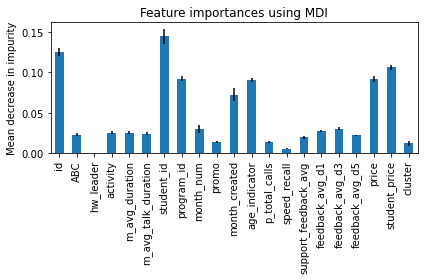

In [81]:
feature_names = X.columns
importances = clf_best.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)


fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [82]:
forest_importances.sort_values(ascending = False)

student_id              0.144798
id                      0.124794
student_price           0.106134
program_id              0.092352
price                   0.091862
age_indicator           0.090565
month_created           0.072494
feedback_avg_d3         0.030773
month_num               0.030143
feedback_avg_d1         0.027688
activity                0.025837
m_avg_duration          0.025360
m_avg_talk_duration     0.024550
ABC                     0.023249
feedback_avg_d5         0.022161
support_feedback_avg    0.019859
promo                   0.014521
p_total_calls           0.013956
cluster                 0.012706
speed_recall            0.005838
hw_leader               0.000358
dtype: float64

### Применение

In [84]:
df_test = pd.read_csv('test_dataset_test.csv')

In [85]:
# 1
df_test['month_num'] = df_test['month_id'].apply(get_month)




In [86]:
# 2 
df_test['promo'] = df_test['promo'].map({'+': 1, '-': 0})

In [87]:
# 3 
df_test['month_created'] = df_test['carts_created_at'].apply(get_month)

In [88]:
le = LabelEncoder()
df_test["ABC"] = le.fit_transform(df_test["ABC"])


In [89]:
#добавлено
df_test['student_price'] = feature_mean(df_test,'student_id','price')

kmeans = KMeans(n_clusters=6)

X_cluster = df_test.loc[:, ['id',
                       "student_id", 
                       'price',
                        'student_price',                       
                       
                       'age_indicator',
                       
                       'feedback_avg_d1', 
        
                        'feedback_avg_d3', 
                        'feedback_avg_d5', 
                       
                       'webinars','lessons',
                       
                       
                         
                                            
                      ]].fillna(-1)

X_cluster["Cluster"] = kmeans.fit_predict(X_cluster )

df_test['cluster'] = X_cluster ["Cluster"].astype("int")

In [94]:
df_test_for_norm = df_test[['id','ABC', 'hw_leader','activity', 'm_avg_duration', 'm_avg_talk_duration', 
        'student_id','program_id',
          'month_num', 'promo','month_created',                        
          'age_indicator', 'p_total_calls','speed_recall',
          'support_feedback_avg',
          'feedback_avg_d1',                  
          'feedback_avg_d3','feedback_avg_d5','price',
                  'student_price','cluster'
         ]]





In [95]:
scaler = MinMaxScaler()

X_result =  pd.DataFrame(scaler.fit_transform(df_test_for_norm ),
            columns=df_test_for_norm .columns, index=df_test_for_norm .index) 



# X_result = df_test[['id','ABC', 'hw_leader','activity', 'm_avg_duration', 'm_avg_talk_duration', 
#         'student_id','program_id',
#           'age_indicator', 'p_total_calls','speed_recall',
#           'support_feedback_avg','spent_time_to_complete_hw',
#           'feedback_avg_d1','feedback_avg_d2',
#           'feedback_avg_d3','feedback_avg_d4','feedback_avg_d5','price'
#          ]]



In [96]:
X_result= X_result.fillna(0)

In [60]:
# pred_res = clf_best.predict(X_result)



In [97]:
# лучшее решение
pred_res = clf.predict(X_result)

In [98]:
df_pred = pd.DataFrame([X_result['id'].T,pred_res])

In [62]:
X_result['id'].to_numpy()

array([0.27211259, 0.79935157, 0.36153139, ..., 0.61390686, 0.63939845,
       0.33396258])

In [99]:
df_pred = pd.DataFrame(pred_res,columns = ['target'])

In [100]:
df_pred

,target
0,0
1,0
2,0
3,0
4,0
...,...
84992,0
84993,0
84994,0
84995,0


In [65]:
df_pred.value_counts()/df_pred.shape[0]

target
0         0.904997
1         0.052684
4         0.012624
5         0.012600
3         0.012047
2         0.005047
dtype: float64

In [67]:
df_res = pd.concat([df_test['id'],df_pred],axis = 1,ignore_index=False)

In [65]:
df_res

,id,target
0,77551,0
1,227812,0
2,103035,0
3,260943,0
4,134611,0
...,...,...
84992,186427,0
84993,197918,0
84994,174961,0
84995,182226,0


In [66]:
df_for_file = df_res[['id','target']]

In [67]:
df_for_file 

,id,target
0,77551,0
1,227812,0
2,103035,0
3,260943,0
4,134611,0
...,...,...
84992,186427,0
84993,197918,0
84994,174961,0
84995,182226,0


In [68]:
df_for_file.reset_index(drop=True, inplace=True)

In [68]:
df_res.to_csv('DataFrame_without_index_9-1.csv', index=False)
print('OK')

OK


In [ ]:
datetime.now()

In [ ]:
# clf.fit(X_train, y_train)
# pred_test = clf.predict(X_test)
# 0.2* recall_score(y_test, pred_test, average='macro') + 0.8* precision_score(y_test, pred_test, average='macro')

# #убрали выбросы цены 0.8547609547570326
# #убрали 'bought_d4', 0.8647130627435904
# # убрали 'spent_time_to_complete_hw',
# # 0.8701628175223912

id      target
1       0         1
2       0         1
3       0         1
5       0         1
7       0         1
                 ..
284990  0         1
284991  0         1
284992  0         1
284993  0         1
284995  0         1
Name: target, Length: 200000, dtype: int64